In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

np.random.seed(0)

#loading data
df = pd.read_csv('student-mat.csv', sep=';')

#checking missing values
print(df.isna().sum())

#feature selection
all_numeric_features = df.select_dtypes(include=[np.number]).drop(columns=['G1', 'G2', 'G3'], errors='ignore')

X_all = all_numeric_features
y = (df['G3'] >= 10).astype(int)

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_all, y)

selected_features = all_numeric_features.columns[selector.get_support()]
print(f"the best features: {list(selected_features)}")
X = X_all[selected_features]

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

#applying feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Training samples: {X_train_scaled.shape[0]}, Test samples: {X_test_scaled.shape[0]}")

#analiysing different values of k and distance metrics
param_grid = {
    'n_neighbors': list(range(1, 41, 2)),
    'metric': ['euclidean', 'manhattan']
}

#CV
knn = KNeighborsClassifier()
grid_clf = GridSearchCV(knn, param_grid, cv=7, scoring='accuracy')
grid_clf.fit(X_train_scaled, y_train)

#the best k, metric, model
print(f"Best k: {grid_clf.best_params_['n_neighbors']}")
print(f"Best metric: {grid_clf.best_params_['metric']}")
best_clf_model = grid_clf.best_estimator_

#accuracy
test_accuracy = grid_clf.score(X_test_scaled, y_test)
print(f"Test accuracy with best model: {test_accuracy:.3f}")
print(f"Best cross-validation accuracy: {grid_clf.best_score_:.3f}")

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = best_clf_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

#saving trained model
joblib.dump(best_clf_model, 'classification_model.pkl')

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
the best features: ['age', 'Medu', 'Fedu', 'failures', 'goout']
Training samples: 276, Test samples: 119
Best k: 11
Best metric: euclidean
Test accuracy with best model: 0.647
Best cross-validation accuracy: 0.728


['classification_model.pkl']

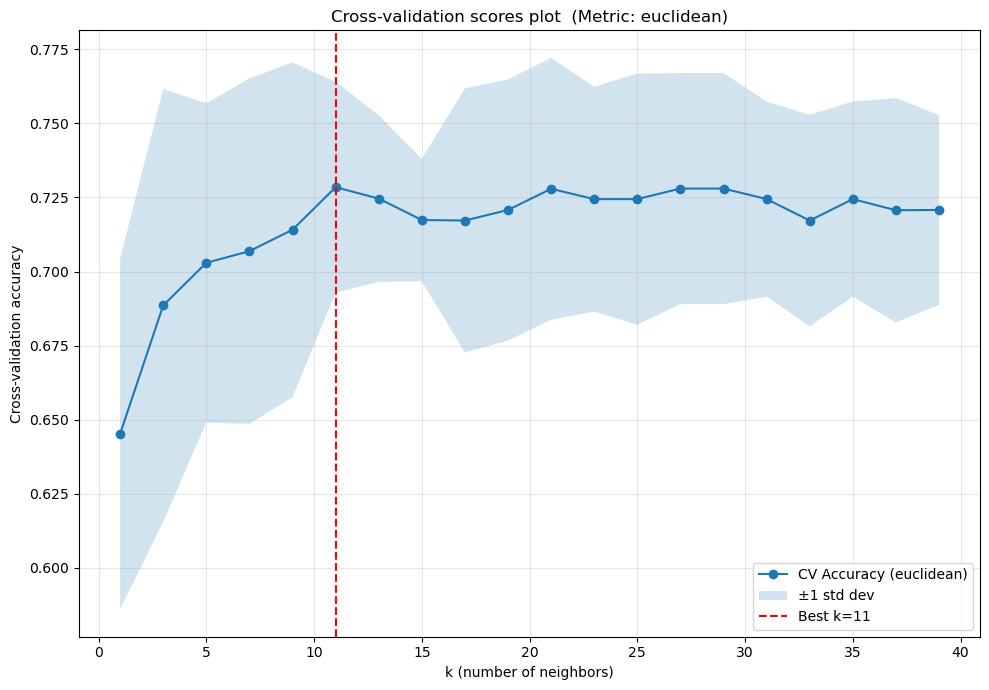

In [16]:
#Cross-validation score plot
plt.figure(figsize=(10, 7))
results = grid_clf.cv_results_
k_vals = param_grid['n_neighbors']

best_metric = grid_clf.best_params_['metric']
mask = results['param_metric'] == best_metric

mean_scores = results['mean_test_score'][mask]
std_scores = results['std_test_score'][mask]

plt.plot(k_vals, mean_scores, 'o-', label=f'CV Accuracy ({best_metric})')

plt.fill_between(k_vals, mean_scores - std_scores, mean_scores + std_scores,
                 alpha=0.2, label='±1 std dev')

plt.axvline(grid_clf.best_params_['n_neighbors'], color='red',
            linestyle='--', label=f"Best k={grid_clf.best_params_['n_neighbors']}")

plt.xlabel('k (number of neighbors)')
plt.ylabel('Cross-validation accuracy')
plt.title(f'Cross-validation scores plot  (Metric: {best_metric})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

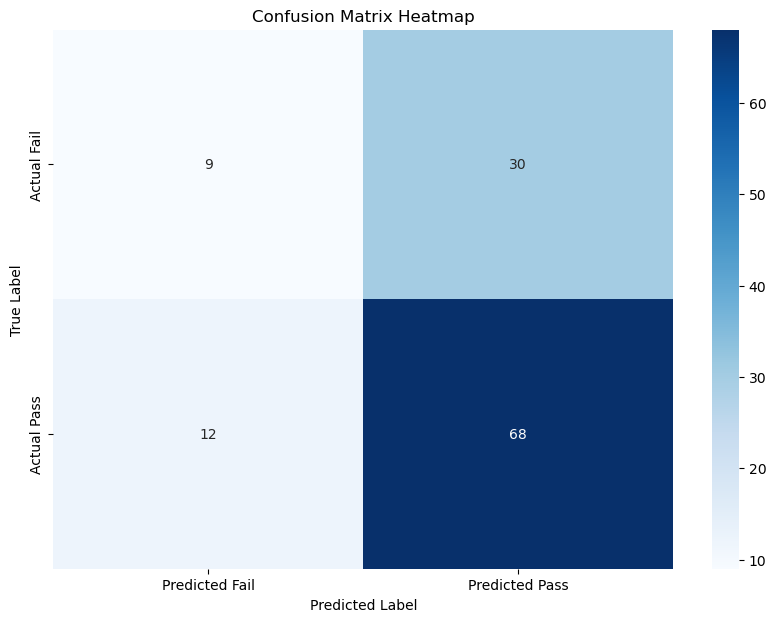

In [21]:
#Confusion matrix heatmap 

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Fail', 'Predicted Pass'], 
            yticklabels=['Actual Fail', 'Actual Pass'])

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
#feature selection
y_reg = df["G3"]

all_numeric_features = df.select_dtypes(include=[np.number]).drop(columns=['G1', 'G2', 'G3'], errors='ignore')

selector_reg = SelectKBest(score_func=f_regression, k=5)
X_selected_reg = selector_reg.fit_transform(all_numeric_features, y_reg)

selected_features_reg = all_numeric_features.columns[selector_reg.get_support()]
print(f"Regression Best Features: {list(selected_features_reg)}")

X_reg = all_numeric_features[selected_features_reg]

#splitting data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.3, random_state=42
)

#applying feature scaling
scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

#analysing different values of k and distance metrics
param_grid_r = {
    'n_neighbors': list(range(1, 41, 2)),
    'metric': ['euclidean', 'manhattan']
}

#CV
knn_reg = KNeighborsRegressor()
grid_reg = GridSearchCV(knn_reg, param_grid_r, cv=7, scoring='r2')
grid_reg.fit(X_train_r_scaled, y_train_r)

#the best k, metric, model
print(f"Best k: {grid_reg.best_params_['n_neighbors']}")
print(f"Best metric: {grid_reg.best_params_['metric']}")
best_reg_model = grid_reg.best_estimator_

#R2 score and MSE
y_pred_r = best_reg_model.predict(X_test_r_scaled)
r2 = r2_score(y_test_r, y_pred_r)
mse = mean_squared_error(y_test_r, y_pred_r)
print(f"R2 Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

#saving trained model
joblib.dump(best_reg_model, 'regression_model.pkl')

Regression Best Features: ['age', 'Medu', 'Fedu', 'failures', 'goout']
Best k: 39
Best metric: euclidean
R2 Score: 0.118
Mean Squared Error: 19.383


['regression_model.pkl']

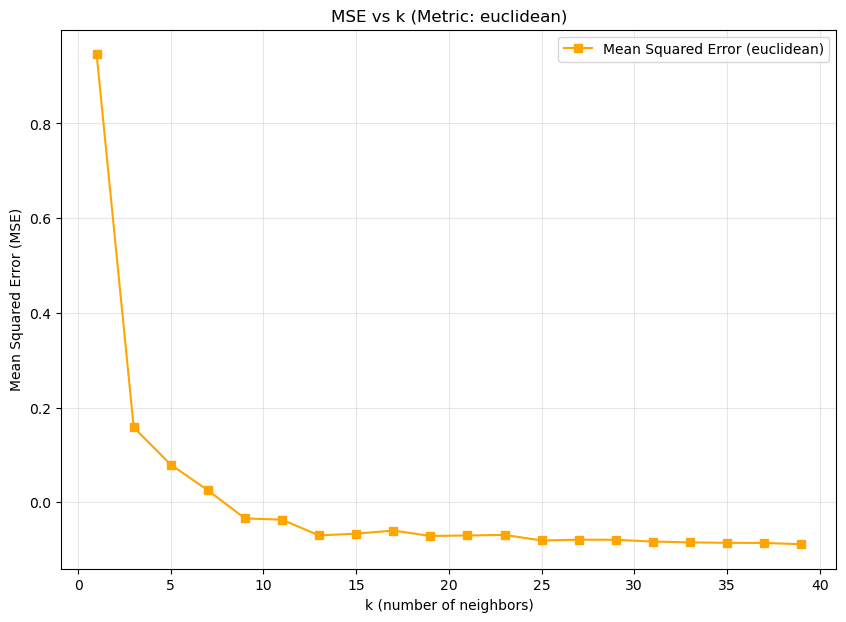

In [19]:
# MSE vs k
plt.figure(figsize=(10, 7))
res_reg = grid_reg.cv_results_
k_vals = param_grid_r['n_neighbors']
best_met_r = grid_reg.best_params_['metric']
mask_r = res_reg['param_metric'] == best_met_r
mse_scores = -res_reg['mean_test_score'][mask_r]
plt.plot(k_vals, mse_scores, 's-', color='orange', label=f'Mean Squared Error ({best_met_r})')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title(f'MSE vs k (Metric: {best_met_r})')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

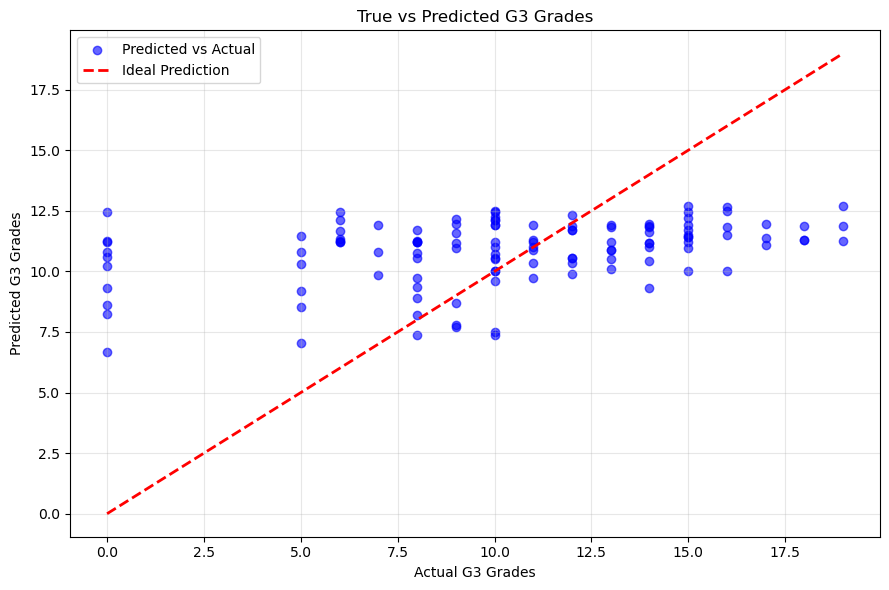

In [20]:
plt.figure(figsize=(9, 6))
plt.scatter(y_test_r, y_pred_r, alpha=0.6, color='blue', label='Predicted vs Actual')

limit_min = min(y_test_r.min(), y_pred_r.min())
limit_max = max(y_test_r.max(), y_pred_r.max())
plt.plot([limit_min, limit_max], [limit_min, limit_max], color='red', linestyle='--', lw=2, label='Ideal Prediction')

plt.xlabel('Actual G3 Grades')
plt.ylabel('Predicted G3 Grades')
plt.title('True vs Predicted G3 Grades')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()